![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

Exercise material of the MSc-level course **Numerical Methods in Geotechnical Engineering**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/soilmechanics


# Exercise 1 - Forward Euler

The ODE $\dot{y} = k (y_\text{eq} - y)$ is to be integrated numerically.

First, we import some libraries for numerical basics and for plotting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Some plot settings
plt.style.use('seaborn-deep')
plt.rcParams['lines.linewidth']= 2.0
plt.rcParams['lines.color']= 'black'
plt.rcParams['legend.frameon']=True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['legend.fontsize']=14
plt.rcParams['font.size'] = 14
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['figure.figsize'] = (8, 6)

We first code the analytical solution of the ODE in order to have something to compare against.

$\displaystyle \frac{\text{d}y}{y_\text{eq}-y} = k\,\text{d}t \quad \rightarrow \quad \int \limits_0^t k\,\text{d}\bar{t} = \int \limits_{y_0}^y \displaystyle \frac{\text{d}\bar{y}}{y_\text{eq}-\bar{y}}$

$kt = \displaystyle \left. - \ln (y_\text{eq}-\bar{y}) \right|^y_{y_0}$

$\exp (-kt) = \displaystyle \frac{y_\text{eq}-y}{y_\text{eq}-y_0}$

$y = y_\text{eq} - (y_\text{eq} - y_0) \exp (-kt)$

Let's define the equilibrium value and the rate constant as global variables

In [2]:
y_eq = 1.
k = 4.

In [3]:
def y_analytical(t,y_0):
    return y_eq - (y_eq - y_0)*np.exp(-k*t)

According to the ODE definition $\dot{y}=f[y(t),t]$ we define the rate function itself:

In [4]:
def dy_dt(y):
    return k*(y_eq - y)

Let's plot the function and its rate for some exemplary values ($y_0 = 0$) in a time interval $t \in [0,4]$:

In [5]:
time = np.linspace(0,4,100)

Text(0, 0.5, '$y$, $\\dot{y}$ / s$^{-1}$')

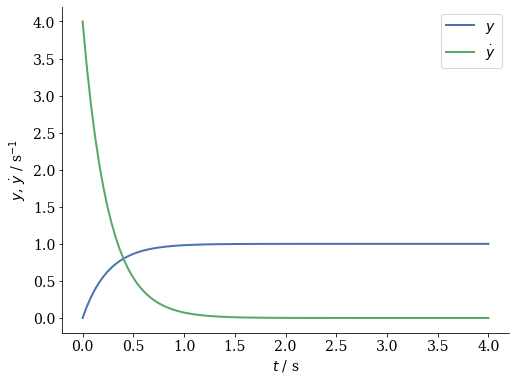

In [6]:
plt.plot(time,y_analytical(time,0),label='$y$')
plt.plot(time,dy_dt(y_analytical(time,0)),label='$\\dot{y}$')
plt.legend()
plt.xlabel('$t$ / s')
plt.ylabel('$y$, $\\dot{y}$ / s$^{-1}$')

Now we want to get the same result with a forward Euler scheme. The forward Euler scheme proceeds fully explicitly with the update formula

$y_{n+1} = y_n + f(y_n) (t_{n+1} - t_n)$

We define the forward Euler update as

$\Delta y_\text{FE} = y_{n+1} - y_n = f(y_n) \Delta t$

In [7]:
def Forward_Euler_Update(y_n,dt):
    return dy_dt(y_n)*dt

We now need to define the time stepping itself. So we choose the same starting value (initial condition) of $y_0 = y(t=0) = 0$ to initialize our solution field and then select a time step size $\Delta t$.
Now, for every time step we append to this array the value of the next time step by applying the forward Euler update rule. Each new time step value then serves as the initial condition for the following time step.

In [8]:
def integrate(dt):
    #Startwerte
    y = np.array([0.])
    times = np.array([0.])
    t_end = 4.
    while times[-1]+dt < t_end: #repeat the loop as long as the final time step is below the end point
        times = np.append(times,times[-1]+dt) #here define the next time point as the previous time point plus the time increment dt
        y = np.append(y,y[-1]+Forward_Euler_Update(y[-1],dt)) #here we calculate the solution at the new time step
    return times, y

In [9]:
from ipywidgets import widgets
from ipywidgets import interact

@interact(dt=widgets.BoundedFloatText(value=0.1,min=1.e-3,max=1,step=0.1,description='$\Delta t$ / s'))

def plot_FE(dt=0.1):
    time_n, y_n = integrate(dt)
    fig, ax = plt.subplots(ncols=2,figsize=(18,6))
    #solution
    ax[0].plot(time,y_analytical(time,0),label='analytical')
    ax[0].plot(time_n,y_n,label='Forward Euler',marker='d',ls=':')
    ax[0].legend()
    ax[0].set_xlabel('$t$ / s')
    ax[0].set_ylabel('$y$')
    #error
    ax[1].plot(time_n,y_n-y_analytical(time_n,0),ls=':',marker='d',label='absolute')
    ax[1].plot(time_n[1:],(y_n[1:]-y_analytical(time_n[1:],0))/y_analytical(time_n[1:],0),
               ls=':',marker='d',label='relative')
    ax[1].legend()
    ax[1].set_xlabel('$t$ / s')
    ax[1].set_ylabel('error')
    
    plt.show()

interactive(children=(BoundedFloatText(value=0.1, description='$\\Delta t$ / s', max=1.0, min=0.001, step=0.1)…

Tasks:

- How does the peak relative error change when you divide the time step size by 10?
- How does the solution change when you increase the rate constant by a factor of 2 and why?
- How does the solution change again for $k=4$ and time step sices of $\Delta t= 0.4$ and  $\Delta t = 0.5$?

For the stability analysis, the substitution $z = y_\text{eq} - y$ and $\bar{k} = -k$ yields our standard test problem $\dot{z} = \bar{k} z$ for which we know the stability criterion $|1 + \bar{k} \Delta t| < 1$. The two conditions produce $\bar{k} < 0$ (inaccordance with our decay problem) and $\Delta t < 2/|\bar{k}|$.